<a href="https://colab.research.google.com/github/MohitDhungana/duplicate_question_detection/blob/master/DQD_mohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print("TEST COLAB AND GITHUB INTEGRATION")

TEST COLAB AND GITHUB INTEGRATION


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls '/content/drive/My Drive'

 case-study-sample.gdoc			   'Computer Network'
 CG					    Datasets
'Ch04-Digital Transmission.gslides'	   'Endnote X8'
'Ch05-Analog Transmission.gslides'	    flower.csv
 Ch06-BWutilization-Mux-Spreading.gslides   OOAD_Final
 Ch07-TxmMedia.gslides			   'Project Management'
 Ch08-Switching-Forouzan.gslides	    Resume.gdoc
 Ch10-ErrorDetCorrection.gslides	   'Software engineering'
 COA					    stock_price.csv
'Colab Notebooks'


In [0]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [0]:
df=pd.read_csv('/content/drive/My Drive/Datasets/train.csv')

In [10]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [11]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
import re
print('ab1c3')
print(re.sub(r"[a-z]",'','ab1c3'))
print(re.sub(r"[^a-z]",'','ab1c3'))

ab1c3
13
abc


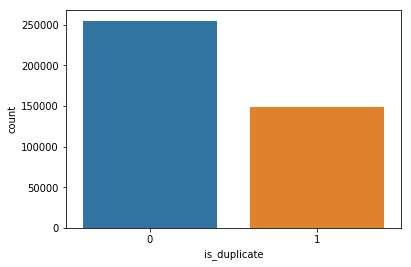

In [13]:
import seaborn as sns
sns.countplot(df['is_duplicate'],label='count')

In [14]:
len(df[df['is_duplicate']==0])

255027

In [15]:
#iloc selects using index of [row,column/s] as integer values
df.iloc[1,[3,4]]

question1    What is the story of Kohinoor (Koh-i-Noor) Dia...
question2    What would happen if the Indian government sto...
Name: 1, dtype: object

In [16]:
# loc selects using index value and label name/s
df.loc[1,['question1','question2']]

question1    What is the story of Kohinoor (Koh-i-Noor) Dia...
question2    What would happen if the Indian government sto...
Name: 1, dtype: object

In [0]:
ques1=df.loc[:,'question1']
# ques1=str(ques1)
# ques1=ques1.split()
# ques1[-2]


In [18]:
len(ques1)

551

In [19]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate


# input layer
#recheck shape before training
left_input=Input(shape=(50,))
right_input=Input(shape=(50,))

# embedding layer
# recheck dims 
embedding_layer=Embedding(input_dim=1000,output_dim=300,input_length=1000)

encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

#LSTM instantiation
# check parameter 
shared_lstm=LSTM(50)

# shared LSTM
left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# merge shared LSTMs
merge_layer = concatenate([left_output, right_output])

# output dense layer
output_layer = Dense(1, activation='sigmoid')(merge_layer)

# define the model
model = tf.keras.Model(inputs=[left_input, right_input], outputs=output_layer)

# summarize layers
print(model.summary())

# plot graph
# tf.keras.utils.plot_model(model, to_file='shared_feature_extractor.png')

# print('end')

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      300000      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None

In [0]:
# compile the model
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

# train (fit) the model
# hist=model.fit([input_column1_head,input_column2_head], output_label, epochs=5, shuffle=True, validation_split=0.2)
# print(hist.history)

In [24]:
txt='A IS a dog a is.'

from tensorflow.keras.preprocessing.text import text_to_word_sequence,Tokenizer,one_hot,hashing_trick
print(txt)
# tokenizer=Tokenizer(lower=True, split=' ')
print(text_to_word_sequence(txt,lower=True, split=' '))
print(hashing_trick(txt,n=10,lower=True,split=' '))
print(one_hot(txt,n=10,lower=True,split=' '))

A IS a dog a is.
['a', 'is', 'a', 'dog', 'a', 'is']
[8, 6, 8, 7, 8, 6]
[8, 6, 8, 7, 8, 6]


In [55]:
from sklearn.model_selection import train_test_split

q1=df.question1[0:5]
q2=df.question2[0:5]
y=df.is_duplicate

# print(q1)
# print(q2)


# q1=str(q1).lower()
# x1_train,x1_test,x2_train,y2_test = train_test_split([q1,q2],y,test_size=0.2,random_state=50)


0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
Name: question1, dtype: object
0    What is the step by step guide to invest in sh...
1    What would happen if the Indian government sto...
2    How can Internet speed be increased by hacking...
3    Find the remainder when [math]23^{24}[/math] i...
4              Which fish would survive in salt water?
Name: question2, dtype: object


In [0]:
def text_to_token(text):
  text=str(text)
  text=text.lower()
  text=text.split()
  
  return text

In [72]:
# for i in range(len(q1)):
#   print(text_to_token(q1[i])) 

a=['asdfafd']
b='zzzz'
a.append(b)
print(a)

['asdfafd', 'zzzz']
